In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [3]:
from keras.utils import to_categorical

In [33]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
xtest.shape

(10000, 32, 32, 3)

In [7]:
ytrain.shape

(50000, 1)

In [8]:
ytest.shape

(10000, 1)

In [9]:
ytrain=ytrain.reshape(-1,)
ytest=ytest.reshape(-1,)

In [10]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [11]:
import matplotlib.pyplot as plt

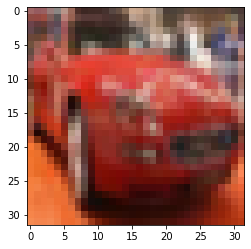

In [12]:
plt.imshow(xtrain[5])

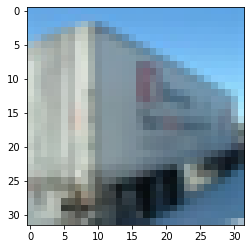

In [13]:
plt.imshow(xtrain[15])

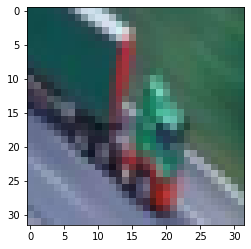

In [14]:
plt.imshow(xtrain[50])

In [15]:
xtrain=xtrain/255.0

In [16]:
model=Sequential([
    Conv2D(32,(4,4),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((3,3)),
    Conv2D(32,(4,4),activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(32,(4,4),activation='relu'),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [17]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [18]:
history=model.fit(xtrain,ytrain,epochs=50,batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 50s 30ms/step - loss: 1.6218 - accuracy: 0.4029
Epoch 2/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3024 - accuracy: 0.5355
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1965 - accuracy: 0.5764
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1214 - accuracy: 0.6047
Epoch 5/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0593 - accuracy: 0.6259
Epoch 6/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0125 - accuracy: 0.6434
Epoch 7/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9778 - accuracy: 0.6549
Epoch 8/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9431 - accuracy: 0.6699
Epoch 9/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9174 - accuracy: 0.6769
Epoch 10/50
1563/1563 [==============================] - 45s 29m

In [19]:
loss=history.history['loss']
acc=history.history['accuracy'] 

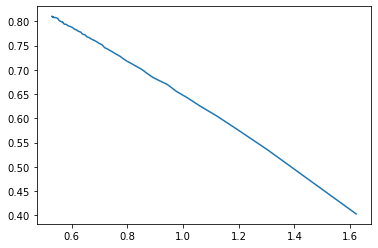

In [20]:
import matplotlib.pyplot as plt
plt.plot(loss,acc)

In [21]:
xtest=xtest/255.0

In [22]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 4s 11ms/step - loss: 1.1111 - accuracy: 0.6753


[1.1110845804214478, 0.6753000020980835]

In [23]:
print(model.predict(xtrain[5].reshape(1,32,32,3)))

1/1 [==============================] - 0s 491ms/step
[[2.3090873e-04 9.9048537e-01 1.2177646e-06 8.2447878e-06 2.8849598e-07
  2.1479916e-06 8.8804991e-05 1.5352045e-04 1.4308074e-05 9.0152686e-03]]


Classes:
1) 0: airplane
2) 1: automobile
3) 2: bird
4) 3: cat
5) 4: deer
6) 5: dog
7) 6: frog
8) 7: horse
9) 8: ship
10) 9: truck

In [24]:
def pred(n):
    if n==0:
        print('airplane')
    elif n==1:
        print('automobile')
    elif n==2:
        print('bird')
    elif n==3:
        print('cat')
    elif n==4:
        print('deer')
    elif n==5:
        print('dog')
    elif n==6:
        print('frog')
    elif n==7:
        print('horse')
    elif n==8:
        print('ship')
    elif n==9:
        print('truck')

In [25]:
t1=model.predict(xtrain[15].reshape(1,32,32,3))

1/1 [==============================] - 0s 113ms/step


In [26]:
import pandas

In [27]:
pred(pandas.Series(t1[0]).idxmax())

truck


In [28]:
xtest=xtest*255.0

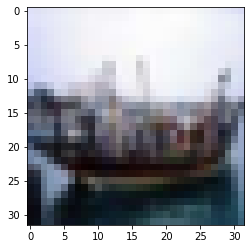

In [35]:
plt.imshow(xtest[18])

In [36]:
t2=model.predict(xtest[18].reshape(1,32,32,3))

1/1 [==============================] - 0s 353ms/step


In [38]:
pred(pandas.Series(t2[0]).idxmax())

ship


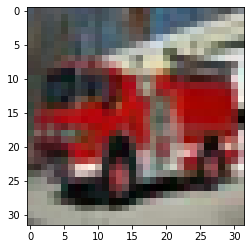

In [45]:
plt.imshow(xtest[23])

In [47]:
t3=model.predict(xtest[23].reshape(1,32,32,3))

1/1 [==============================] - 0s 104ms/step


In [48]:
pred(pandas.Series(t3[0]).idxmax())

truck


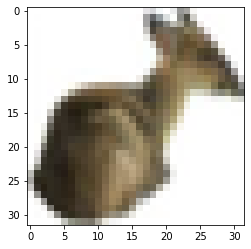

In [55]:
plt.imshow(xtest[188])

In [56]:
t4=model.predict(xtest[65].reshape(1,32,32,3))

1/1 [==============================] - 0s 52ms/step


In [57]:
pred(pandas.Series(t4[0]).idxmax())

horse


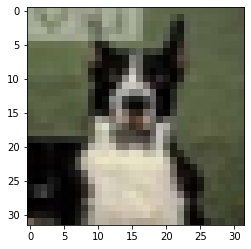

In [87]:
plt.imshow(xtest[345])

In [88]:
t5=model.predict(xtest[345].reshape(1,32,32,3))

1/1 [==============================] - 0s 51ms/step


In [89]:
pred(pandas.Series(t5[0]).idxmax())

dog
